In [5]:
pip install --upgrade tensorflow

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/kidney_cleaned_dadaset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
x = df.drop("classification", axis=1).values
y = df["classification"].values

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [10]:
x_scaled = x_scaled.reshape((x_scaled.shape[0], x_scaled.shape[1], 1))

In [11]:
x.shape[1]

24

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# CNN Model
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_heart_model.h5', save_best_only=True)


In [16]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stop, checkpoint], verbose=1)

Epoch 1/100
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4041 - loss: 0.7716

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4919 - loss: 0.7009 - val_accuracy: 0.6719 - val_loss: 0.6263
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8152 - loss: 0.4121 - val_accuracy: 0.9375 - val_loss: 0.6513
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9254 - loss: 0.2524 - val_accuracy: 0.8281 - val_loss: 0.6626
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9249 - loss: 0.2144 - val_accuracy: 0.4219 - val_loss: 0.6683
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9765 - loss: 0.1113 - val_accuracy: 0.3906 - val_loss: 0.6736
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9907 - loss: 0.0579 - val_accuracy: 0.4062 - val_loss: 0.6656
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9802 - loss: 0.0719 - val_accuracy: 0.5781 - val_loss: 0.6286
Epoch 8/100
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9892 - loss: 0.0486 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9901 - loss: 0.0478 - val_accuracy: 0.6719 - val_loss: 0.5827
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9793 - loss: 0.0683 - val_accuracy: 0.5156 - val_loss: 0.6117
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9936 - loss: 0.0256 - val_accuracy: 0.5156 - val_loss: 0.6167
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9807 - loss: 0.0386

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9806 - loss: 0.0389 - val_accuracy: 0.7188 - val_loss: 0.5303
Epoch 12/100
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9829 - loss: 0.0477

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.7031 - val_loss: 0.5166
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9948 - loss: 0.0220

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9945 - loss: 0.0222 - val_accuracy: 0.8906 - val_loss: 0.4516
Epoch 14/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9931 - loss: 0.0254

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9918 - loss: 0.0295 - val_accuracy: 0.8750 - val_loss: 0.4322
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9796 - loss: 0.0626 - val_accuracy: 0.6875 - val_loss: 0.5077
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9760 - loss: 0.0572 - val_accuracy: 0.8438 - val_loss: 0.4405
Epoch 17/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9910 - loss: 0.0326 - val_accuracy: 0.7344 - val_loss: 0.4772
Epoch 18/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9991 - loss: 0.0076 - val_accuracy: 0.6250 - val_loss: 0.5867
Epoch 19/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9940 - loss: 0.0315 - val_accuracy: 0.7031 - val_loss: 0.5496
Epoch 20/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9803 - loss: 0.0492 - val_accuracy: 0.6875 - val_loss: 0.5000
Epoch 21/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9965 - loss: 0.0144 - val_accuracy: 0.6875 - val_loss: 0.49

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9936 - loss: 0.0224 - val_accuracy: 0.8594 - val_loss: 0.2946
Epoch 24/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9975 - loss: 0.0151 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9974 - loss: 0.0151 - val_accuracy: 0.8750 - val_loss: 0.2467
Epoch 25/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9945 - loss: 0.0142 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9938 - loss: 0.0153 - val_accuracy: 0.9219 - val_loss: 0.2030
Epoch 26/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9949 - loss: 0.0180 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.9531 - val_loss: 0.1693
Epoch 27/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.8750 - val_loss: 0.3163
Epoch 28/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9936 - loss: 0.0126 - val_accuracy: 0.9375 - val_loss: 0.1842
Epoch 29/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0054 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9844 - val_loss: 0.1282
Epoch 30/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9941 - loss: 0.0176 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9939 - loss: 0.0175 - val_accuracy: 0.9844 - val_loss: 0.1003
Epoch 31/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9936 - loss: 0.0117 - val_accuracy: 0.9531 - val_loss: 0.1393
Epoch 32/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9910 - loss: 0.0222 - val_accuracy: 0.9844 - val_loss: 0.1062
Epoch 33/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.9688 - val_loss: 0.1072
Epoch 34/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 0.9531 - val_loss: 0.1489
Epoch 35/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9375 - val_loss: 0.1350
Epoch 36/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9855 - loss: 0.0262 - val_accuracy: 0.9219 - val_loss: 0.1380
Epoch 37/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9375 - val_loss: 0.14

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9934 - loss: 0.0112 - val_accuracy: 0.9688 - val_loss: 0.0874
Epoch 40/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9062 - val_loss: 0.2181
Epoch 41/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8906 - val_loss: 0.2928
Epoch 42/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9866 - loss: 0.0199 - val_accuracy: 0.9531 - val_loss: 0.1226
Epoch 43/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9531 - val_loss: 0.1016
Epoch 44/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.9531 - val_loss: 0.0969
Epoch 45/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9901 - loss: 0.0240 - val_accuracy: 0.9531 - val_loss: 0.1718
Epoch 46/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9531 - val_loss: 0.12

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9531 - val_loss: 0.0861
Epoch 49/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0018 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9531 - val_loss: 0.0836
Epoch 50/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9531 - val_loss: 0.0905
Epoch 51/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9901 - loss: 0.0094 - val_accuracy: 0.9531 - val_loss: 0.1618
Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9531 - val_loss: 0.1234
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9908 - loss: 0.0167     

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9893 - loss: 0.0214 - val_accuracy: 0.9844 - val_loss: 0.0674
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9219 - val_loss: 0.3436
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9961 - loss: 0.0210 - val_accuracy: 0.9531 - val_loss: 0.2371
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9531 - val_loss: 0.1022
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9986 - loss: 0.0110 - val_accuracy: 0.9688 - val_loss: 0.0986
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9936 - loss: 0.0073 - val_accuracy: 0.9531 - val_loss: 0.1116
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9531 - val_loss: 0.1059
Epoch 60/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9688 - val_loss: 0.08

In [17]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Accuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [18]:
# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


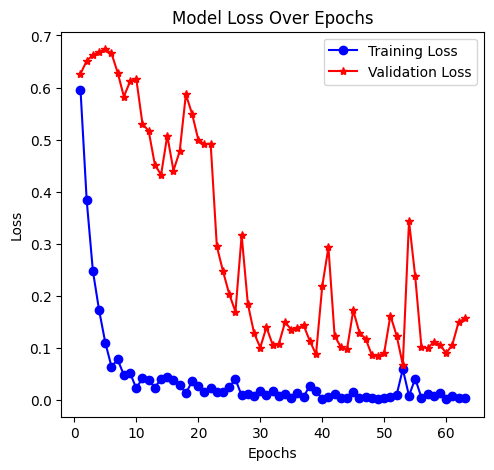

In [19]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

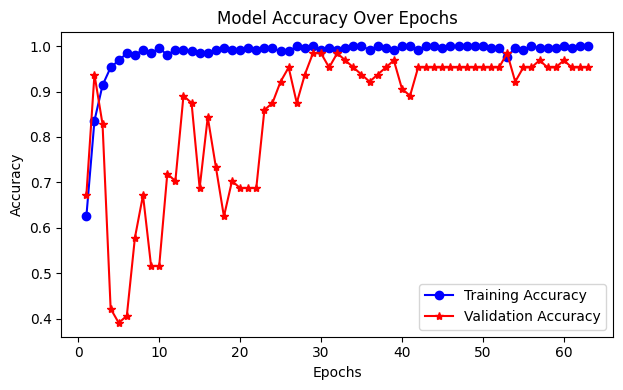

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


{'total_parameters': 158337,
 'FLOPs': 1865729,
 'GFLOPs': 0.001865729,
 'model_size_bytes': 1968520,
 'model_size_MB': 1.8773269653320312,
 'inference_time_seconds': 0.1036527156829834,
 'accuracy': 0.987500011920929}